## Mean stress correction methods

Tension mean stresses reduce the fatigue life from that observed with completely reversed loading. 

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

### Goodman correction method

Function `goodmanCorrection` implements the Goodman correction method.

The Goodman diagram, originally proposed in 1890, is a graphical representation of this effect. The Goodman correction could be expressed as

<!-- The alternating stress is plotted on one axis and the mean stress on the other. The allowable alternating stress with no mean stress is the fatigue limit. The maximum mean stress, with zero alternating stress, is the ultimate strength. A straight line is then drawn between the two points. Any combination of mean and alternating stress on this line will have the same fatigue life. Mathematically this may be expressed as: -->

$$
\frac{\sigma_a}{\sigma_{FL}} + \frac{\sigma_{m}}{\sigma_{u}} = 1 
$$

where $\sigma_{u}$ is the ultimate strength; $\sigma_{mean}$ is the mean stress of the stress range, $\sigma_{m} = (\sigma_l + \sigma_u)/2$; $\sigma_a$ is the alternating stress, $\sigma_{a} = ( \sigma_u - \sigma_l )/2$; $\sigma_{FL}$ is the fatigue limit. 


Reference: 

* Rychlik, I., 1987. A new definition of the rainflow cycle counting method. International journal of fatigue, 9(2), pp.119-121.

#### Function help

In [2]:
from ffpack.lcc import goodmanCorrection

help( goodmanCorrection )

Help on function goodmanCorrection in module ffpack.lcc.meanStressCorrection:

goodmanCorrection(stressRange, sigma, n=1.0)
    The Goodman correction in this implementation is applicable to cases with stress 
    ratio no less than -1
    
    Parameters
    ----------
    stressRange: 1d array
        Stress range, e.g., [ lowerStress, upperStress ].
    sigma: scalar
        Ultimate tensile strength.
    n: scalar, optional
        Safety factor, default to 1.0.
    
    Returns
    -------
    rst: scalar
        Fatigue limit.
    
    Raises
    ------
    ValueError
        If the stressRange dimension is not 1, or stressRange length is not 2.
        If stressRange[ 1 ] <= 0 or stressRange[ 0 ] >= stressRange[ 1 ].
        If sigma is not a scalar or sigma <= 0.
        If sigma is smaller than upper stress stressRange[ 1 ].
        If n < 1.0.
    
    Examples
    --------
    >>> from ffpack.lcc import goodmanCorrection
    >>> stressRange = [ 1.0, 2.0 ]
    >>> sigma = 4.0

#### Example with default values

In [3]:
stressRangeData = [ 1.0, 2.0 ]
sigma = 4.0

goodmanResult = goodmanCorrection( stressRangeData, sigma )

In [4]:
print( goodmanResult )

0.8


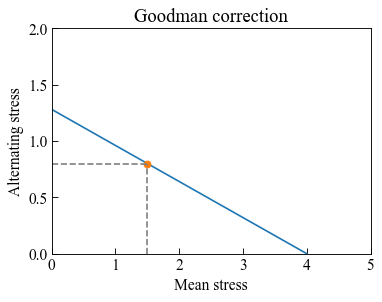

In [5]:
fig, ax = plt.subplots()

alt = sigma * goodmanResult / ( sigma - np.mean( stressRangeData ) )
x = [ 0, np.mean(stressRangeData), sigma ]
y = [ alt, goodmanResult, 0 ]

ax.plot( x, y, "-" )

ax.tick_params( axis='x', direction="in", length=5 )
ax.tick_params( axis='y', direction="in", length=5 )
plt.xlim( left=0, right=5 )
plt.ylim( bottom=0, top=2 )

point = ( np.mean(stressRangeData), goodmanResult )
ax.plot( x[1], y[1], "o" )
ax.axvline( point[0], ymin=0, ymax=point[1]/2, linestyle='--', color='gray') # plot vertical line
ax.axhline( point[1], xmin=0, xmax=point[0]/5, linestyle='--', color='gray') # plot horizontal line

ax.set_xlabel( "Mean stress" )
ax.set_ylabel( "Alternating stress" )
ax.set_title( "Goodman correction" )

plt.tight_layout()
plt.show()